In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/AMAN_ASSIGNMENTS/AMAN_ASSIGNMENTS/Assignment-7/Logistic Regression/Titanic_train.csv")
df2=pd.read_csv("/content/drive/MyDrive/AMAN_ASSIGNMENTS/AMAN_ASSIGNMENTS/Assignment-7/Logistic Regression/Titanic_test.csv")

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [ ]:
print(df1.describe())
print(df2.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

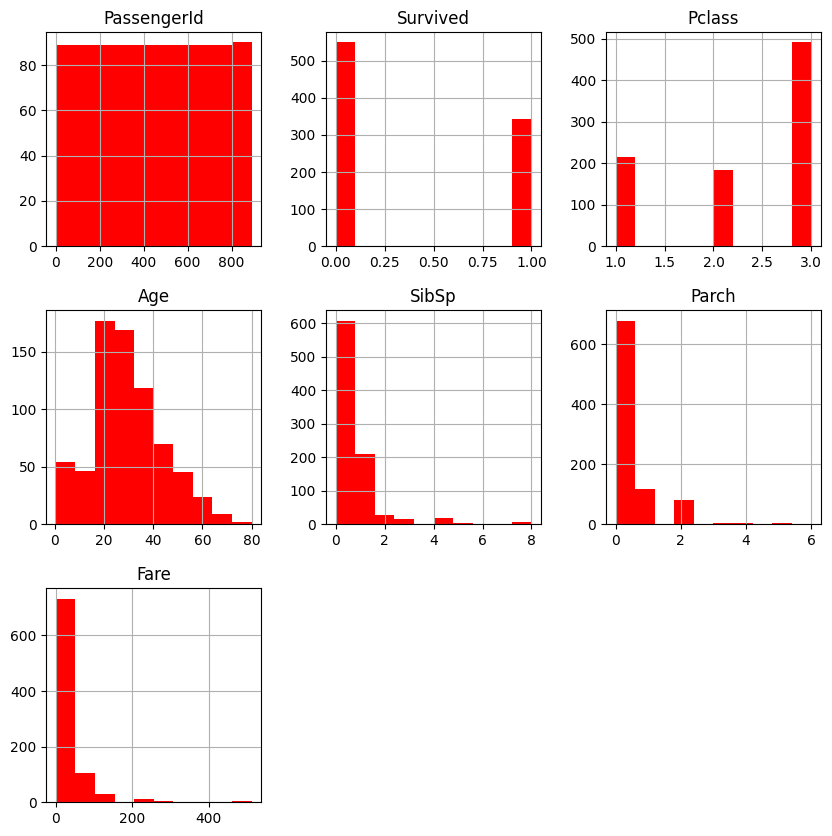

In [ ]:
#visualize the distributions and relationships between features
# Histograms
df1.hist(figsize=(10, 10),color="red")
plt.show()


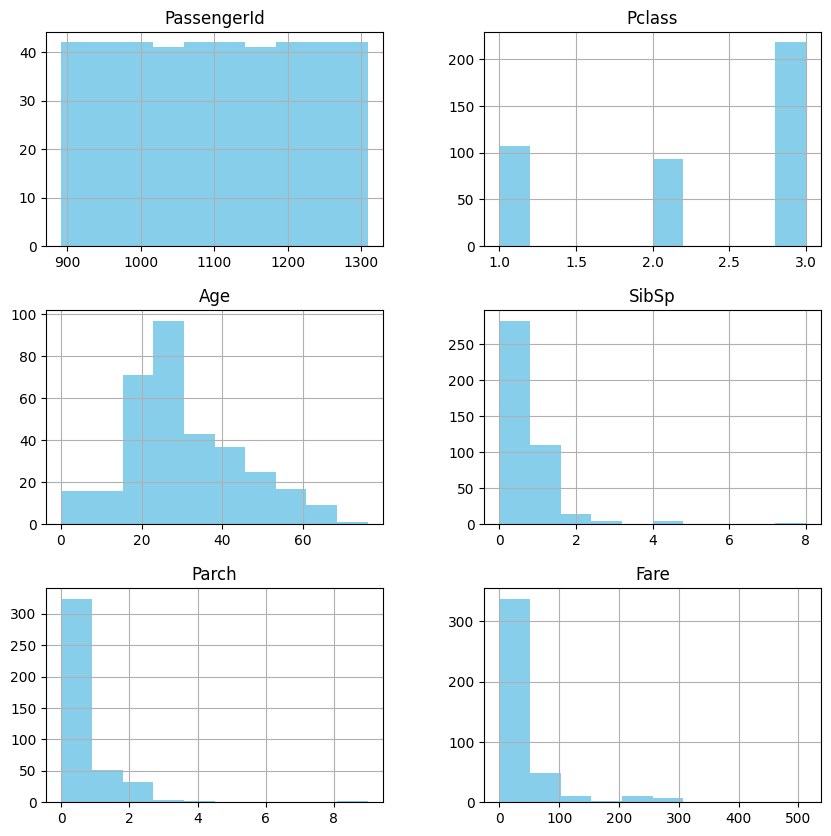

In [ ]:
df2.hist(figsize=(10, 10),color="skyblue")
plt.show()

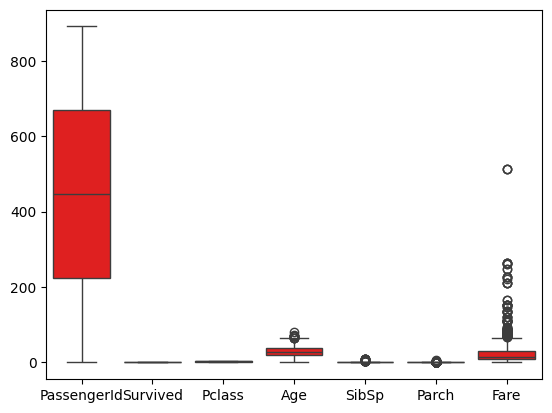

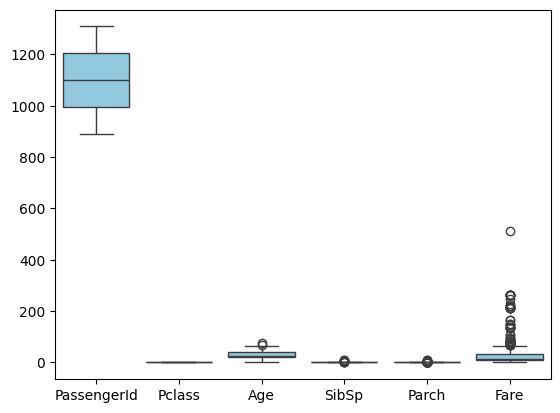

In [ ]:
# Box plots
sns.boxplot(data=df1,color="red")
plt.show()
sns.boxplot(data=df2,color="skyblue")
plt.show()

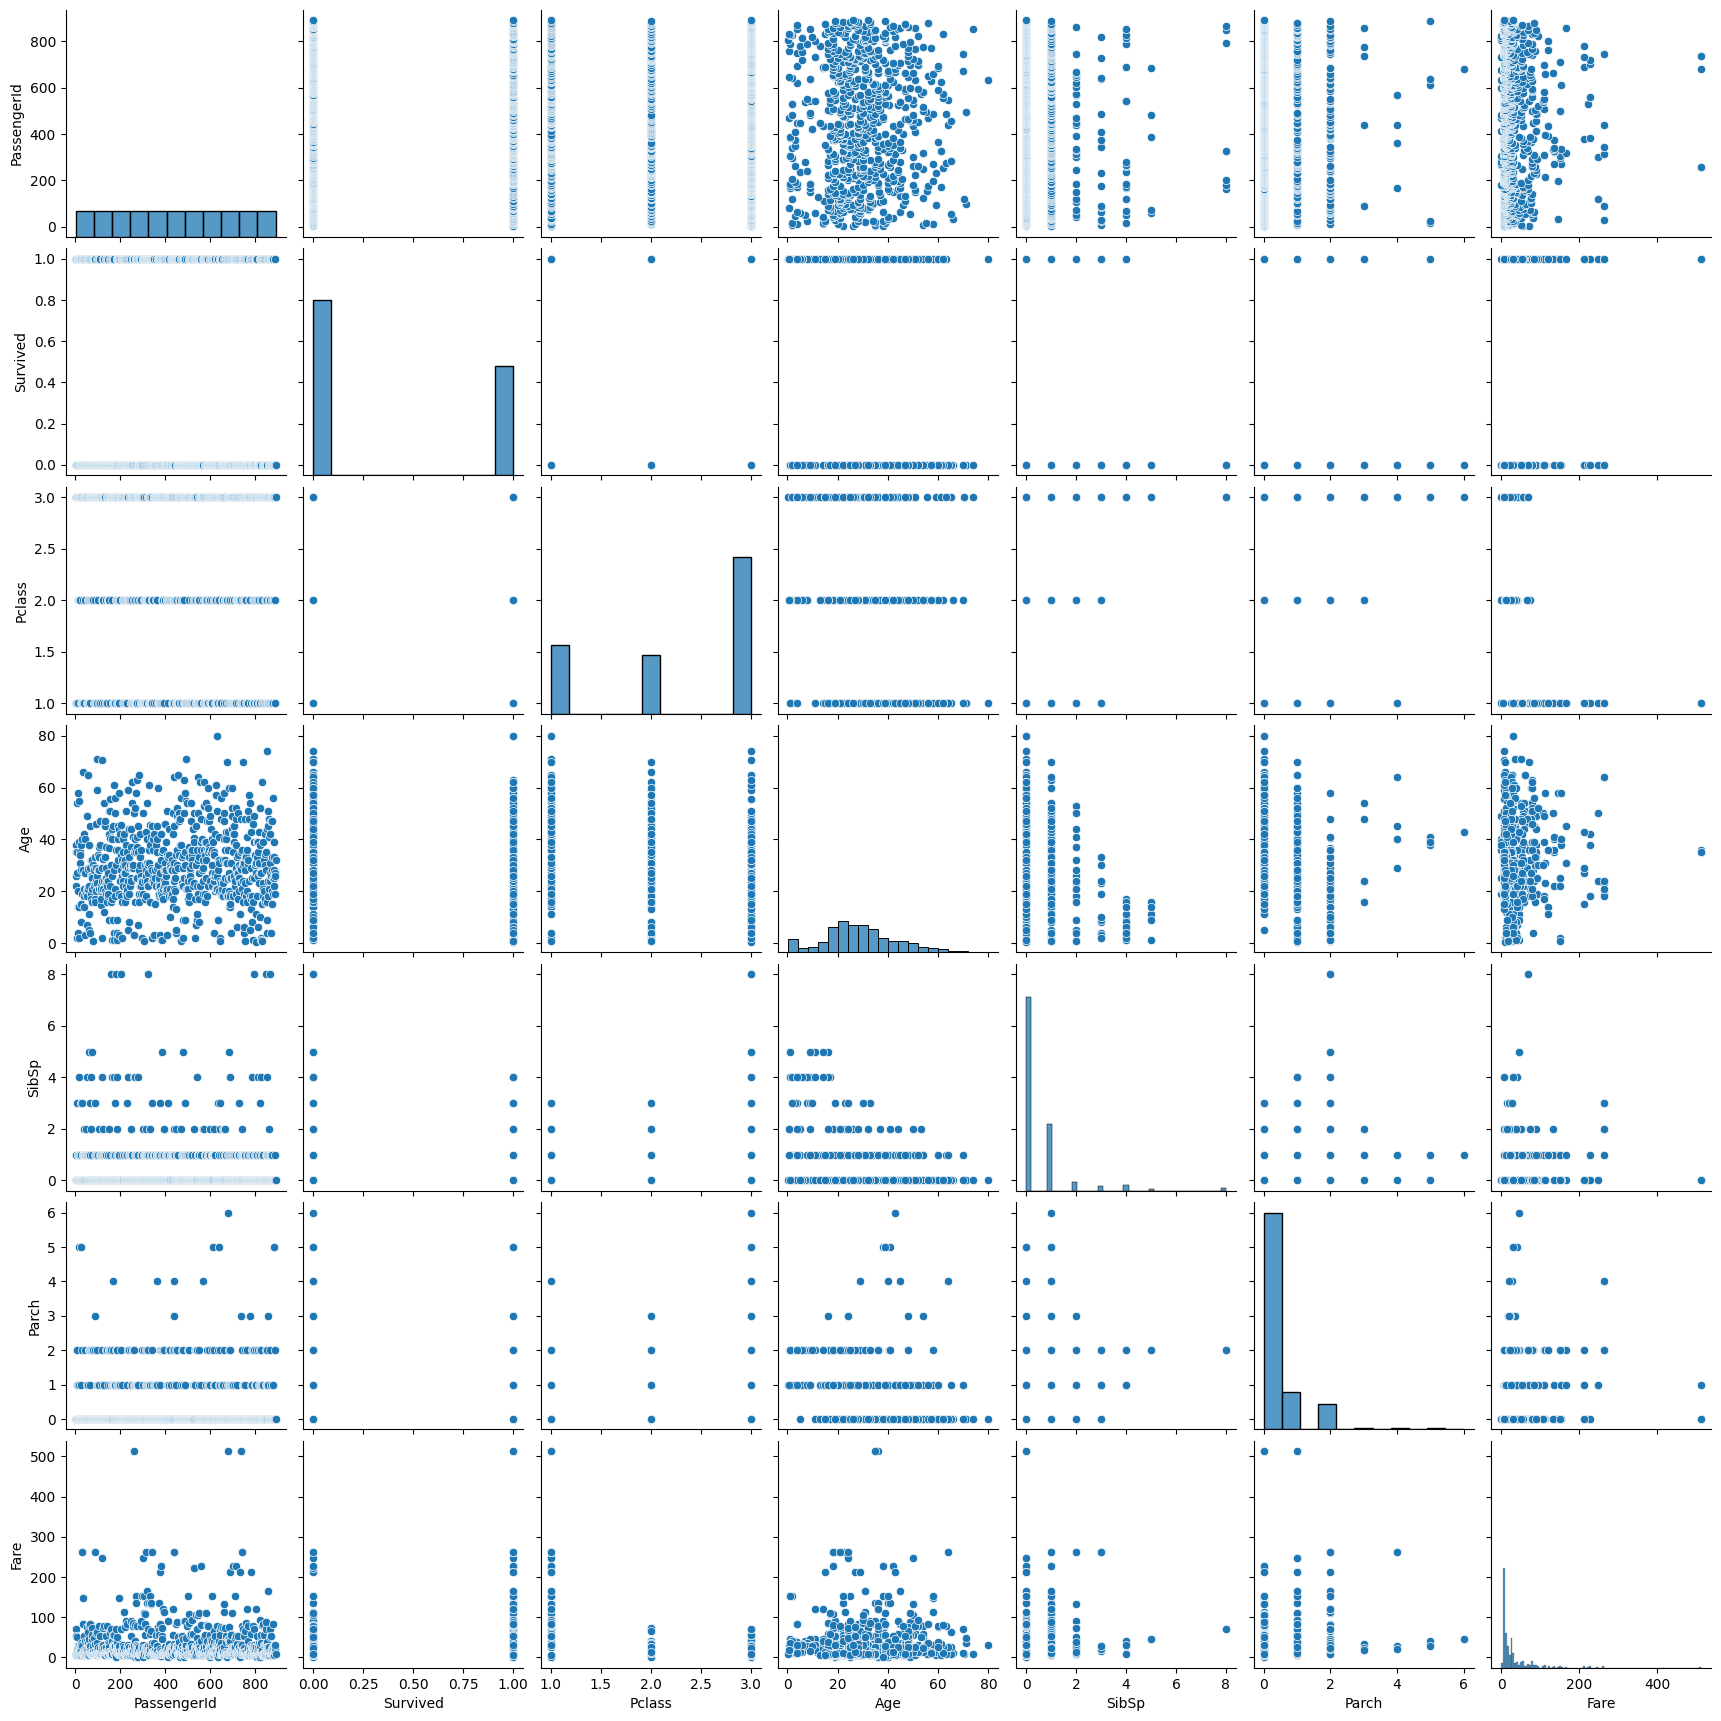

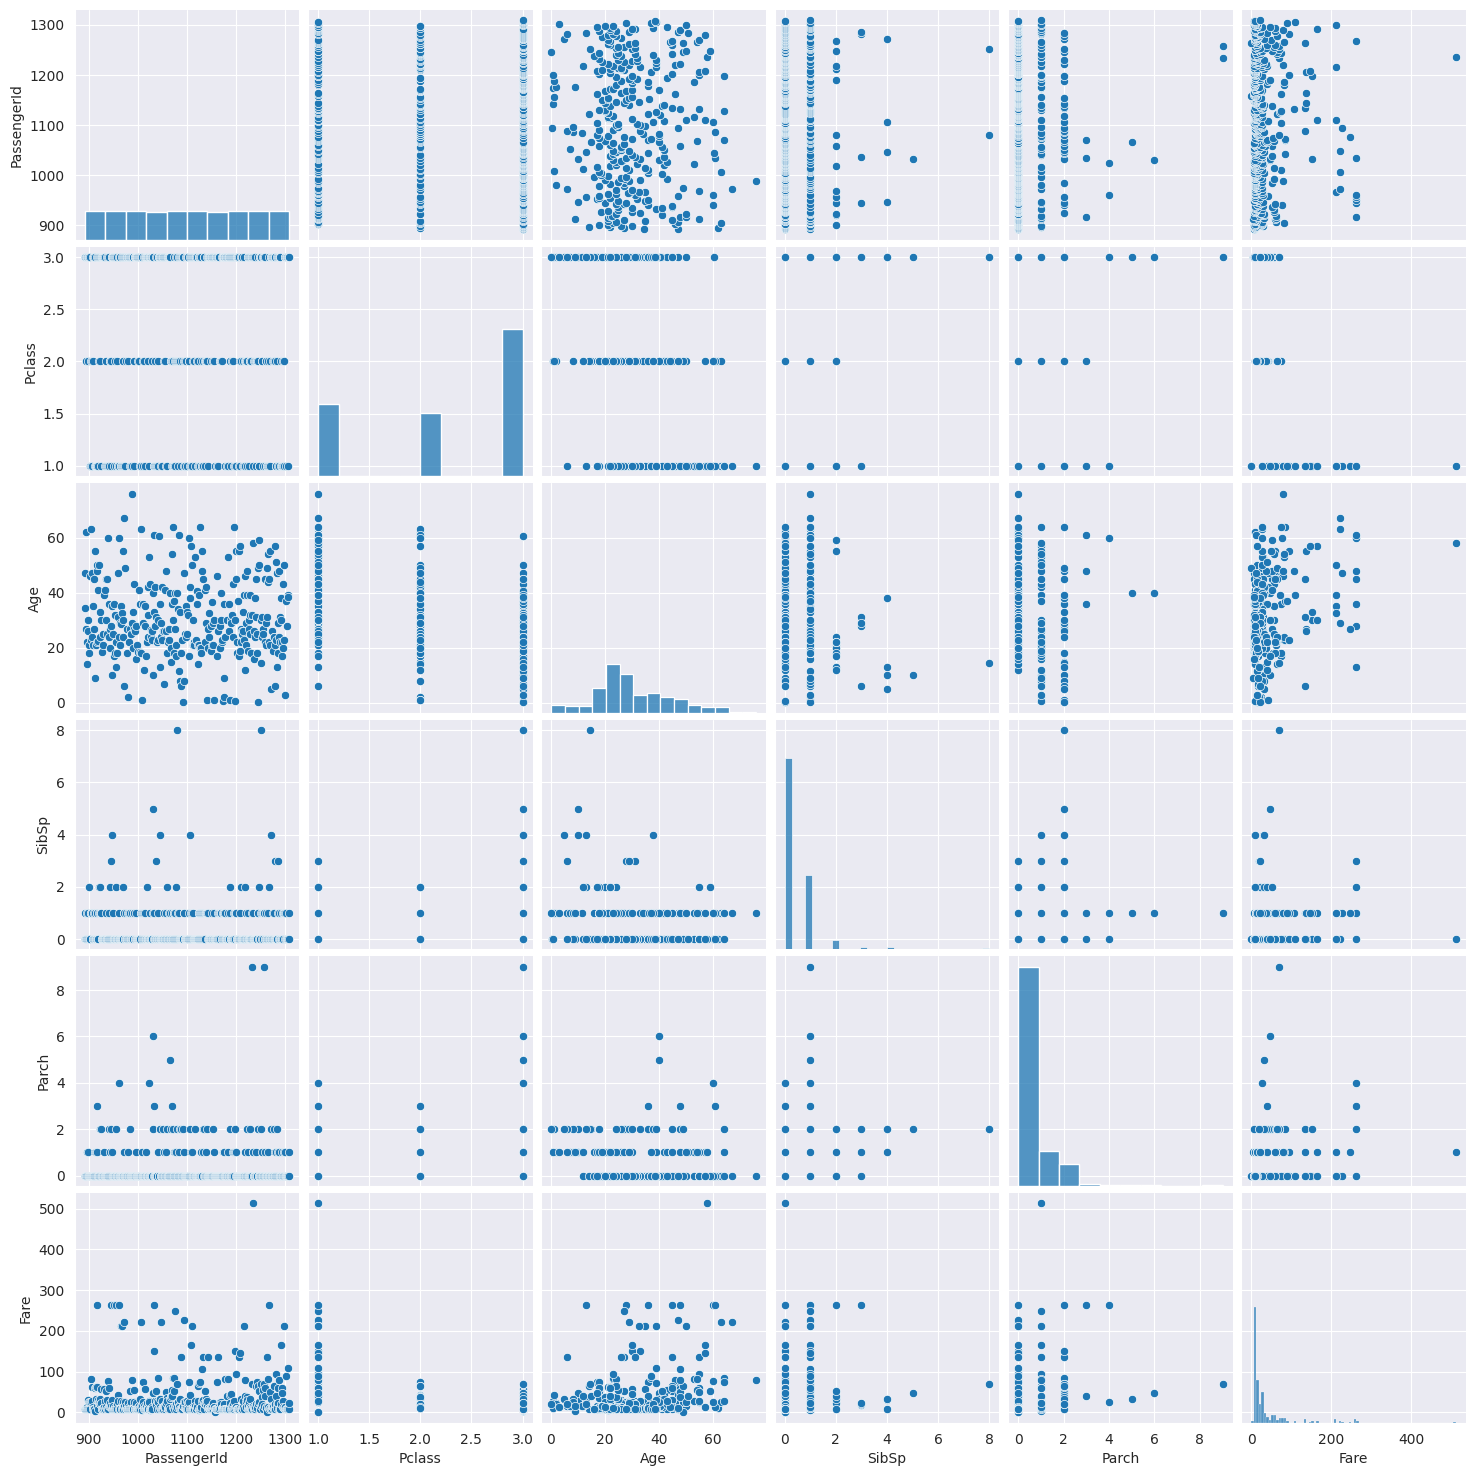

In [ ]:
# Pair plots
sns.pairplot(df1,diag_kind="hist")
sns.set_style("darkgrid")
plt.show()
sns.pairplot(df2,diag_kind="hist")
plt.show()

Data Preprocessing:

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/AMAN_ASSIGNMENTS/AMAN_ASSIGNMENTS/Assignment-7/Logistic Regression/Titanic_train.csv"
df_test = pd.read_csv(file_path)

# Impute missing values for 'Age' and 'Fare' using the median
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

# Drop the 'Cabin' column due to too many missing values
df_test.drop(columns=['Cabin'], inplace=True)

# Encoding categorical variables: 'Sex' and 'Embarked'
# Using one-hot encoding for 'Embarked' and label encoding for 'Sex'
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

print(df_test.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

Model Building

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/AMAN_ASSIGNMENTS/AMAN_ASSIGNMENTS/Assignment-7/Logistic Regression/Titanic_train.csv")
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df1.shape

(891, 12)

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
train_file_path ="/content/drive/MyDrive/AMAN_ASSIGNMENTS/AMAN_ASSIGNMENTS/Assignment-7/Logistic Regression/Titanic_train.csv"
df_train = pd.read_csv(train_file_path)

# Preprocessing function to handle missing values and encode categorical data
def preprocess_data(df):
    # Impute missing values for 'Age' and 'Fare' using the median
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Drop the 'Cabin' column due to too many missing values
    df.drop(columns=['Cabin'], inplace=True)

    # Encoding categorical variables: 'Sex' and 'Embarked'
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

    return df

# Preprocess the training data
df_train = preprocess_data(df_train)

# Define the features (X) and target (y)
X = df_train.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = df_train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 81.17%


Interpretation

In [39]:
import pandas as pd
import numpy as np

feature_names = X.columns
coefficients = logreg.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])  # To see the magnitude
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df)

      Feature  Coefficient  Abs_Coefficient
1         Sex     2.568249         2.568249
0      Pclass    -1.052183         1.052183
3       SibSp    -0.339897         0.339897
6  Embarked_Q     0.189676         0.189676
7  Embarked_S    -0.151975         0.151975
4       Parch    -0.078251         0.078251
2         Age    -0.038516         0.038516
5        Fare     0.002643         0.002643


Interview Questions

1. What is the difference between precision and recall?

ANS- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Recall is the ratio of correctly predicted positive observations to all actual positive observations.

Difference Between Precision and Recall:
Precision focuses on the quality of the positive predictions, ensuring fewer false positives.
Recall focuses on capturing as many actual positives as possible, ensuring fewer false negatives.



2. What is cross-validation, and why is it important in binary classification?ANS-

Cross-validation is a statistical method used to assess the performance and generalization ability of a machine learning model. It involves dividing the dataset into multiple subsets   "fol," training the model on some of the subse), and validating it on the remaining subse

Importance of cross-validation in binary classification:

1**Prevents Overfitti**
 **Reduces Bias and Variae**
. **Makes Efficient Use of ta**4. **Helps with Hyperparameter Ting*
5. **Performance Evaltion**t)